In [1]:
%load_ext autoreload
%autoreload 2

In [41]:
import json
import numpy as np
from netcal.metrics import ECE
from ReliabilityDiagram import ReliabilityDiagram
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 15})

def bining(data, labels, filename=None, n_bins = 15):
    prob = np.exp(np.array(data))
    pred = np.argmax(prob, axis=1)
    acu = [int(x==y) for x,y in zip(pred,labels)]
    print(f'averge query level accu: {sum(acu)/len(acu):.4f}')
    print('number of sample: ', len(acu))
#     return
    
#     bin_edges = np.linspace(0,1,nbins+1)
#     bin_edges_l = bin_edges[:-1]
#     bin_edges_r = bin_edges[1:]
    
#     bins = []

    ece = ECE(n_bins)
    confidences = np.array(prob)
    ground_truth = np.array(labels)
#     print(confidences.shape, ground_truth.shape)
    uncalibrated_score = ece.measure(confidences, ground_truth)

    diagram = ReliabilityDiagram(n_bins)
    diagram.plot(confidences, ground_truth, filename=filename)  # visualize miscalibration of uncalibrated
    
    print(f"ECE: {uncalibrated_score}")
    


Grand results: 
averge query level accu: 0.8430
number of sample:  4000
ECE: 0.29309678422287117
Diff Grand results: 
averge query level accu: 0.8488
number of sample:  4000
ECE: 0.24077945263311265


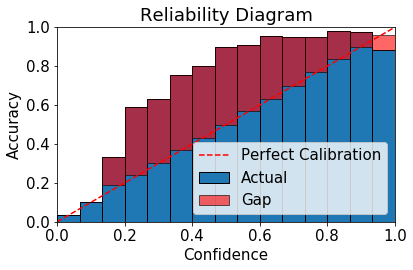

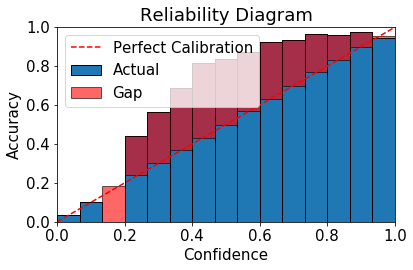

In [45]:
import os
files = os.listdir()

print("Grand results: ")
labels = []
pred = None
for i in range(1,5):
    label_file = f"grand_seed{i}_label.npy"
    pred_file = f"grand_seed{i}_output.npy"
    if label_file not in files:
        continue
    labels += list(np.load(label_file))
    if pred is not None:
        pred = np.concatenate([pred,np.load(pred_file)], axis=0)
    else:
        pred = np.load(pred_file)
bining(pred, labels, f"grand.pdf")

print("Diff Grand results: ")
labels = []
pred = None
for i in range(1,11):
    label_file = f"diff_grand_seed{i}_label.npy"
    pred_file = f"diff_grand_seed{i}_output.npy"
    if label_file not in files:
        continue
    labels += list(np.load(label_file))
    if pred is not None:
        pred = np.concatenate([pred,np.load(pred_file)], axis=0)
    else:
        pred = np.load(pred_file)
bining(pred, labels, f"diff_grand.pdf")
    
    
    

Self GCN results: 
averge query level accu: 0.8113
number of sample:  10000
ECE: 0.030388057388365284
Diff GCN results: 
averge query level accu: 0.8256
number of sample:  10000
ECE: 0.053482962909340875


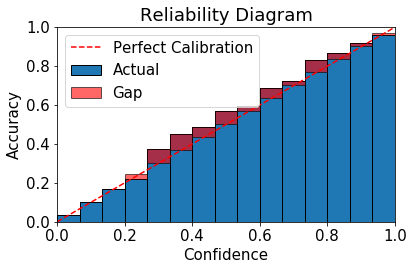

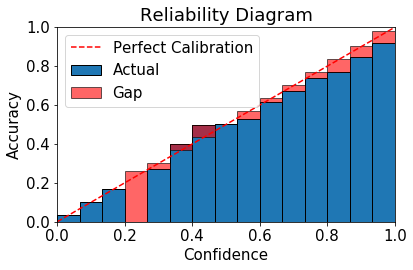

In [52]:
import os
from scipy.special import log_softmax
files = os.listdir()

# print("GCN results: ")
# labels = []
# pred = None
# for i in range(1,11):
#     label_file = f"gcn_seed{i}_label.npy"
#     pred_file = f"gcn_seed{i}_output.npy"
#     if label_file not in files:
#         continue
#     labels += list(np.load(label_file))
#     if pred is not None:
#         pred = np.concatenate([pred,np.load(pred_file)], axis=0)
#     else:
#         pred = np.load(pred_file)
# pred = log_softmax(pred, 1)
# bining(pred, labels, f"gcn.pdf")

print("Self GCN results: ")
labels = []
pred = None
for i in range(1,11):
    label_file = f"self_gcn_seed{i}_label.npy"
    pred_file = f"self_gcn_seed{i}_output.npy"
    if label_file not in files:
        continue
    labels += list(np.load(label_file))
    if pred is not None:
        pred = np.concatenate([pred,np.load(pred_file)], axis=0)
    else:
        pred = np.load(pred_file)
pred = log_softmax(pred, 1)
bining(pred, labels, f"self_gcn.pdf")

print("Diff GCN results: ")
labels = []
pred = None
for i in range(1,11):
    label_file = f"diff_gcn_seed{i}_label.npy"
    pred_file = f"diff_gcn_seed{i}_output.npy"
    if label_file not in files:
        continue
    labels += list(np.load(label_file))
    if pred is not None:
        pred = np.concatenate([pred,np.load(pred_file)], axis=0)
    else:
        pred = np.load(pred_file)
pred = log_softmax(pred, 1)
bining(pred, labels, f"diff_gcn.pdf")

Unroll results: 
averge query level accu:  0.9357798165137615
ECE: 0.038014408987049664
Smart results: 
averge query level accu:  0.9243119266055045
ECE: 0.056698795168771625
Baseline results: 
averge query level accu:  0.9174311926605505
ECE: 0.07105081993232078


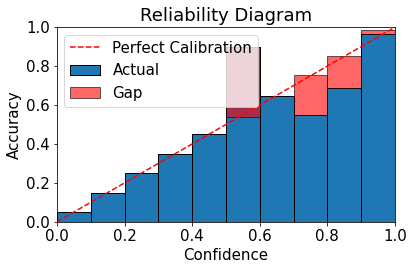

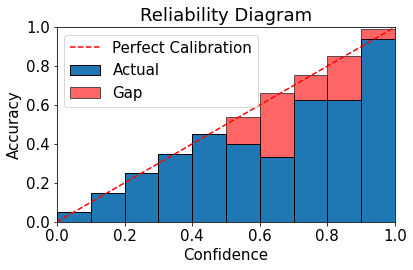

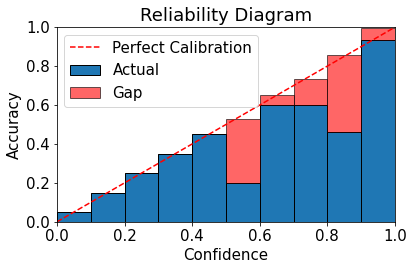

In [117]:
true_labels = {
    "sst": [1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1],
    "rte": [0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0]
}

task = "sst"

with open(f'{task}_unroll.json', 'r') as f:
    print("Unroll results: ")
    unroll_data = json.load(f)
    bining(unroll_data, true_labels[task], f"{task}_unroll.pdf")
    
with open(f'{task}_smart.json', 'r') as f:
    print("Smart results: ")
    unroll_data = json.load(f)
    bining(unroll_data, true_labels[task], f"{task}_smart.pdf")
    
with open(f'{task}_baseline.json', 'r') as f:
    print("Baseline results: ")
    unroll_data = json.load(f)
    bining(unroll_data, true_labels[task], f"{task}_baseline.pdf")
    